In [0]:
# Step 1: Import the necessary libraries
import urllib.request

# Step 2: Download the data and store it in a temporary location
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")

# Step 3: Move the data from the temporary location to the Databricks filesystem
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")

# Step 4: Display the contents of the directory to confirm the data is moved
display(dbutils.fs.ls("dbfs:/kdd"))


path name size modificationTime dbfs:/kdd/kddcup_data.gz kddcup_data.gz 2144903 1719982365000

In [0]:
# Step 1: Load the data from the Databricks filesystem into an RDD
rdd = sc.textFile("dbfs:/kdd/kddcup_data.gz")

# Step 2: Print 10 values from the RDD
print("First 10 values of the RDD:")
for line in rdd.take(10):
    print(line)

# Step 3: Verify the type of data structure
print("\nType of the data structure:", type(rdd))


First 10 values of the RDD:
0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.0

In [0]:

# Step 1: Split each line into a list of features
rdd_split = rdd.map(lambda line: line.split(","))

# Step 2: Show the total number of features (columns)
num_features = len(rdd_split.first())
print("Total number of features (columns):", num_features)

# Step 3: Print the first 10 rows of the split data
print("First 10 rows of the split data:")
for row in rdd_split.take(10):
    print(row)



Total number of features (columns): 42
First 10 rows of the split data:
['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '235', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '29', '29', '1.00', '0.00', '0.03', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '219', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',

In [0]:
# Define the indices of the required columns based on the KDD Cup 99 dataset description
required_columns = {
    "duration": 0,
    "protocol_type": 1,
    "service": 2,
    "flag": 3,
    "src_bytes": 4,
    "dst_bytes": 5,
    "label": 41  # 'label' is the last column
}

# Extract the specified columns
rdd_extracted = rdd_split.map(lambda line: (
    line[required_columns["duration"]],
    line[required_columns["protocol_type"]],
    line[required_columns["service"]],
    line[required_columns["flag"]],
    line[required_columns["src_bytes"]],
    line[required_columns["dst_bytes"]],
    line[required_columns["label"]]
))

# Convert the RDD to a DataFrame
from pyspark.sql import Row

# Create a DataFrame from the RDD
df_extracted = rdd_extracted.map(lambda row: Row(
    duration=row[0],
    protocol_type=row[1],
    service=row[2],
    flag=row[3],
    src_bytes=row[4],
    dst_bytes=row[5],
    label=row[6]
)).toDF()

# Print the schema of the DataFrame
df_extracted.printSchema()

# Display the first 10 rows of the DataFrame
display(df_extracted.limit(10))


root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- label: string (nullable = true)



duration protocol_type service flag src_bytes dst_bytes label 0 tcp http SF 181 5450 normal. 0 tcp http SF 239 486 normal. 0 tcp http SF 235 1337 normal. 0 tcp http SF 219 1337 normal. 0 tcp http SF 217 2032 normal. 0 tcp http SF 217 2032 normal. 0 tcp http SF 212 1940 normal. 0 tcp http SF 159 4087 normal. 0 tcp http SF 210 151 normal. 0 tcp http SF 212 786 normal.

protocol_type count udp 20354 tcp 190065 icmp 283602

service count tftp_u 1 pm_dump 1 red_i 1 tim_i 7 X11 11 urh_i 14 IRC 43 Z39_50 92 netstat 95 ctf 97 name 98 kshell 98 exec 99 netbios_dgm 99 http_443 99 ldap 101 pop_2 101 link 102 netbios_ns 102 daytime 103 efs 103 login 104 hostnames 104 nnsp 105 supdup 105 ssh 105 klogin 106 uucp_path 106 vmnet 106 uucp 106 bgp 106 mtp 107 netbios_ssn 107 sunrpc 107 courier 108 nntp 108 printer 109 sql_net 110 whois 110 rje 111 shell 112 echo 112 iso_tsap 115 systat 115 discard 116 domain 116 gopher 117 imap4 117 remote_job 120 csnet_ns 126 time 157 pop_3 202 auth 328 ntp_u 380 telnet 513 urp_i 538 finger 670 ftp 798 eco_i 1642 ftp_data 4721 domain_u 5863 other 7237 smtp 9723 http 64293 private 110893 ecr_i 281400

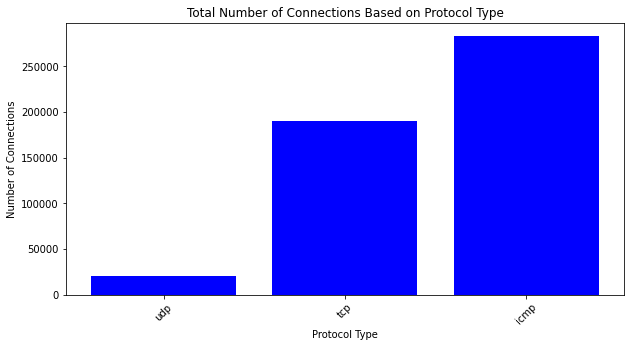

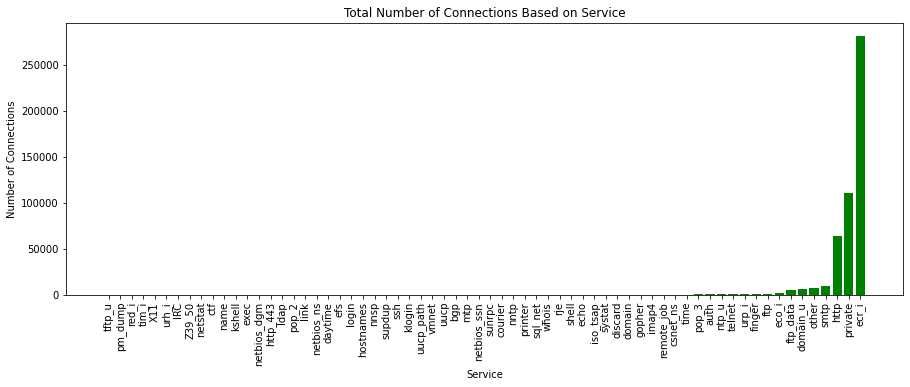

In [0]:
# Step 1: Aggregate the data based on protocol_type and service

# Aggregate based on protocol_type
protocol_type_counts = df_extracted.groupBy("protocol_type").count().orderBy("count", ascending=True)

# Aggregate based on service
service_counts = df_extracted.groupBy("service").count().orderBy("count", ascending=True)

# Step 2: Show the results in ascending order

# Show the results for protocol_type
display(protocol_type_counts)

# Show the results for service
display(service_counts)

# Step 3: Plot the bar graphs

import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
protocol_type_counts_pd = protocol_type_counts.toPandas()
service_counts_pd = service_counts.toPandas()

# Plot the bar graph for protocol_type
plt.figure(figsize=(10, 5))
plt.bar(protocol_type_counts_pd['protocol_type'], protocol_type_counts_pd['count'], color='blue')
plt.xlabel('Protocol Type')
plt.ylabel('Number of Connections')
plt.title('Total Number of Connections Based on Protocol Type')
plt.xticks(rotation=45)
plt.show()

# Plot the bar graph for service
plt.figure(figsize=(15, 5))
plt.bar(service_counts_pd['service'], service_counts_pd['count'], color='green')
plt.xlabel('Service')
plt.ylabel('Number of Connections')
plt.title('Total Number of Connections Based on Service')
plt.xticks(rotation=90)
plt.show()


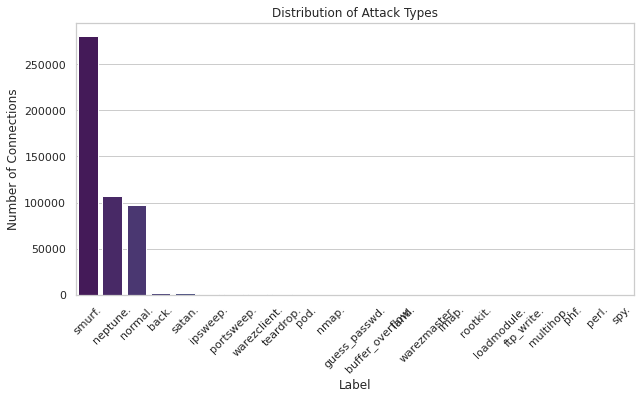

/databricks/python/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


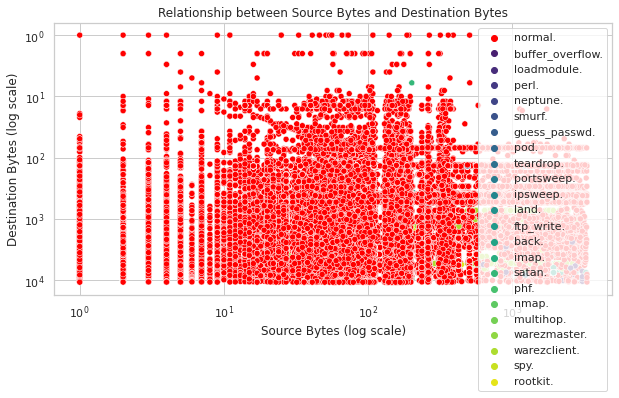

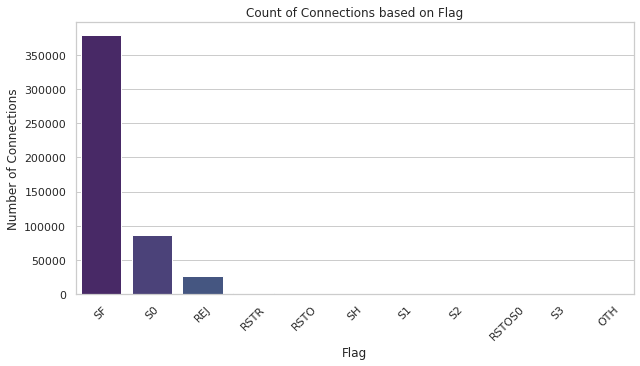

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# 1. Distribution of Attack Types (label column)
label_counts = df_extracted.groupBy("label").count().orderBy("count", ascending=False)
label_counts_pd = label_counts.toPandas()

plt.figure(figsize=(10, 5))
sns.barplot(x='label', y='count', data=label_counts_pd, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Number of Connections')
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)
plt.show()

# 2. Relationship between Source Bytes (src_bytes) and Destination Bytes (dst_bytes) with log scale
# and distinct color for 'normal' points

# Convert to Pandas DataFrame for plotting
data_pd = df_extracted.toPandas()

# Dynamically create a color palette
unique_labels = data_pd['label'].unique()
palette = {label: 'red' if label == 'normal.' else sns.color_palette('viridis', len(unique_labels))[i] for i, label in enumerate(unique_labels)}

plt.figure(figsize=(10, 5))
sns.scatterplot(x='src_bytes', y='dst_bytes', data=data_pd, hue='label', palette=palette)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Source Bytes (log scale)')
plt.ylabel('Destination Bytes (log scale)')
plt.title('Relationship between Source Bytes and Destination Bytes')
plt.legend(loc='upper right')
plt.show()

# 3. Count of Connections based on Flag
flag_counts = df_extracted.groupBy("flag").count().orderBy("count", ascending=False)
flag_counts_pd = flag_counts.toPandas()

plt.figure(figsize=(10, 5))
sns.barplot(x='flag', y='count', data=flag_counts_pd, palette='viridis')
plt.xlabel('Flag')
plt.ylabel('Number of Connections')
plt.title('Count of Connections based on Flag')
plt.xticks(rotation=45)
plt.show()


In [0]:
from pyspark.sql.functions import when

# Create a new label column where 'normal' is 'normal' and everything else is 'attack'
df_extracted = df_extracted.withColumn("new_label", when(df_extracted["label"] == "normal.", "normal").otherwise("attack"))

# Show the updated DataFrame
display(df_extracted.limit(10))


duration protocol_type service flag src_bytes dst_bytes label new_label 0 tcp http SF 181 5450 normal. normal 0 tcp http SF 239 486 normal. normal 0 tcp http SF 235 1337 normal. normal 0 tcp http SF 219 1337 normal. normal 0 tcp http SF 217 2032 normal. normal 0 tcp http SF 217 2032 normal. normal 0 tcp http SF 212 1940 normal. normal 0 tcp http SF 159 4087 normal. normal 0 tcp http SF 210 151 normal. normal 0 tcp http SF 212 786 normal. normal

In [0]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Convert columns to appropriate types
df_extracted = df_extracted.withColumn("duration", col("duration").cast("double"))
df_extracted = df_extracted.withColumn("src_bytes", col("src_bytes").cast("double"))
df_extracted = df_extracted.withColumn("dst_bytes", col("dst_bytes").cast("double"))

# Index the categorical columns
protocol_indexer = StringIndexer(inputCol="protocol_type", outputCol="protocol_type_indexed")
service_indexer = StringIndexer(inputCol="service", outputCol="service_indexed")
flag_indexer = StringIndexer(inputCol="flag", outputCol="flag_indexed")
label_indexer = StringIndexer(inputCol="new_label", outputCol="label_indexed")

# Assemble the feature columns
feature_assembler = VectorAssembler(inputCols=[
    "duration", 
    "protocol_type_indexed", 
    "service_indexed", 
    "src_bytes", 
    "dst_bytes", 
    "flag_indexed"
], outputCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[protocol_indexer, service_indexer, flag_indexer, label_indexer, feature_assembler])
pipeline_model = pipeline.fit(df_extracted)

# Transform the data
df_transformed = pipeline_model.transform(df_extracted)


In [0]:
display(df_transformed)

duration protocol_type service flag src_bytes dst_bytes label new_label protocol_type_indexed service_indexed flag_indexed label_indexed features 0.0 tcp http SF 181.0 5450.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 181.0, 5450.0, 0.0)) 0.0 tcp http SF 239.0 486.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 239.0, 486.0, 0.0)) 0.0 tcp http SF 235.0 1337.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 235.0, 1337.0, 0.0)) 0.0 tcp http SF 219.0 1337.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 219.0, 1337.0, 0.0)) 0.0 tcp http SF 217.0 2032.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 217.0, 2032.0, 0.0)) 0.0 tcp http SF 217.0 2032.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 217.0, 2032.0, 0.0)) 0.0 tcp http SF 212.0 1940.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 212.0, 1940.0, 0.0)) 0.0 tcp http SF 159.0 4087.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 159.0, 4087.0, 0.0)) 0.0 tcp http SF 210.0 151.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 210.0, 151.0, 0.0)) 0.0 tcp http SF 212.0 786.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 212.0, 786.0, 0.0)) 0.0 tcp http SF 210.0 624.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 210.0, 624.0, 0.0)) 0.0 tcp http SF 177.0 1985.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 177.0, 1985.0, 0.0)) 0.0 tcp http SF 222.0 773.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 222.0, 773.0, 0.0)) 0.0 tcp http SF 256.0 1169.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 256.0, 1169.0, 0.0)) 0.0 tcp http SF 241.0 259.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 241.0, 259.0, 0.0)) 0.0 tcp http SF 260.0 1837.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 260.0, 1837.0, 0.0)) 0.0 tcp http SF 241.0 261.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 241.0, 261.0, 0.0)) 0.0 tcp http SF 257.0 818.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 257.0, 818.0, 0.0)) 0.0 tcp http SF 233.0 255.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 233.0, 255.0, 0.0)) 0.0 tcp http SF 233.0 504.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 233.0, 504.0, 0.0)) 0.0 tcp http SF 256.0 1273.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 256.0, 1273.0, 0.0)) 0.0 tcp http SF 234.0 255.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 234.0, 255.0, 0.0)) 0.0 tcp http SF 241.0 259.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 241.0, 259.0, 0.0)) 0.0 tcp http SF 239.0 968.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 239.0, 968.0, 0.0)) 0.0 tcp http SF 245.0 1919.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 245.0, 1919.0, 0.0)) 0.0 tcp http SF 248.0 2129.0 normal. normal 1.0 2.0 0.0 1.0 Map(vectorType -> dense, length -> 6, values -> List(0.0, 1.0, 2.0, 248.0, 2129.0, 0.0)) 0.0 tc

In [0]:
# Split the data into training and test sets
train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)


In [0]:
from pyspark.ml.classification import LinearSVC

# Create a Linear SVM model
svm = LinearSVC(labelCol="label_indexed", featuresCol="features", maxIter=10)

# Train the model
svm_model = svm.fit(train_data)

# Make predictions
predictions = svm_model.transform(test_data)

# Show some predictions
display(predictions.select("new_label", "prediction", "rawPrediction").limit(10))


new_label prediction rawPrediction attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882)) attack 0.0 Map(vectorType -> dense, length -> 2, values -> List(1.0355017417600882, -1.0355017417600882))

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Additional metrics
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)
print(f"F1 Score: {f1_score}")


Accuracy: 0.9768257433347483
F1 Score: 0.97670739851267
